In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

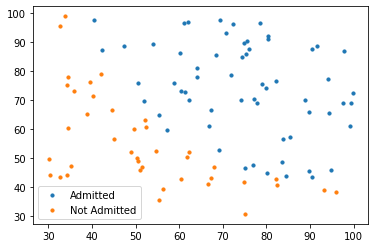

In [2]:
data = pd.read_csv('ex2data1.txt', header=None)

X = data.iloc[:, : -1]
y = data.iloc[:, -1]

admitted = data.loc[y==1]
not_admitted = data.loc[y==0]

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()

In [3]:
X = np.c_[np.ones((X.shape[0], 1)), X]
y = y[:, np.newaxis]
theta = np.zeros((X.shape[1], 1))

In [4]:
print(X.shape, y.shape, theta.shape)

(100, 3) (100, 1) (3, 1)


In [5]:
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

In [6]:
def cost_function(theta, x, y):
    m=len(y)
    hypothesis= sigmoid(np.dot(x,theta))
    error= (np.multiply(-y,np.log(hypothesis)) - np.multiply((1-y),np.log(1-hypothesis)))
    return 1/m * np.sum(error)

def gradient(theta, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, sigmoid(X@theta) - y)

def gradient_descent(x, y, theta, lr, iters):
    J_his = []

    for i in range(iters):
        cost_his = cost_function(theta, x, y)
        J_his.append(cost_his)
        theta = theta - (lr * gradient(theta, x, y))
    
    return theta, J_his

In [7]:
cost1 = cost_function(theta, X, y)
cost1

0.6931471805599453

In [8]:
theta_new, cost_histo = gradient_descent(X, y, theta, 0.001, 500)
cost_histo

[0.6931471805599453,
 0.6982906893667756,
 0.6597117632164304,
 0.6616272696122698,
 0.6488615344619069,
 0.6496960933384357,
 0.6431098658230966,
 0.643465208403156,
 0.6395252291304567,
 0.6396433985595573,
 0.6370958143658066,
 0.6370920319486808,
 0.635363941186405,
 0.6352984316106897,
 0.6340877668005976,
 0.6339936718949524,
 0.633125646725684,
 0.6330216021356835,
 0.6323883118787017,
 0.6322847375635183,
 0.6318163531631344,
 0.6317188518166225,
 0.6313685596695288,
 0.6312798606508632,
 0.6310154145487915,
 0.6309365325158851,
 0.6307352444762725,
 0.6306661892096085,
 0.6305118243674822,
 0.6304520423504117,
 0.6303328235419461,
 0.6302814737119625,
 0.6301887608673643,
 0.6301448853987385,
 0.6300722801235663,
 0.6300349078097728,
 0.629977633975346,
 0.6299458400963784,
 0.6299003081500374,
 0.6298732463364131,
 0.6298367425157885,
 0.6298136588197971,
 0.6297841208182375,
 0.6297643567554732,
 0.6297402101408136,
 0.6297231991786368,
 0.6297032370644748,
 0.62968849749830

In [9]:
theta_new

array([[-0.03477121],
       [ 0.01066652],
       [ 0.0007217 ]])

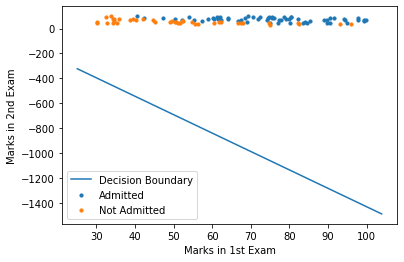

In [10]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_values = - (theta_new[0] + theta_new[1]*x_values) / theta_new[2]

plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.legend()
plt.show()